In [2]:
import pandas as pd
train = pd.read_csv('cleaned_comments.csv')

In [3]:
train.head()

,Unnamed: 0,Link,Title,Category,Post Author,Leading Comment,Publish Time,Reply Authors,Reply Comments,Reply Times
0,0,http://sellercentral.amazon.com/forums/t/2-box...,2 boxes of books,Fulfillment By Amazon,Earth_Light_Books,need know start,2020-05-26 17:33:26+00:00,<function get_reply_authors at 0x00000119FBB60...,"['need know start', 'amazon platform new selle...","[Timestamp('2020-05-26 17:48:57+0000', tz='UTC..."
1,1,http://sellercentral.amazon.com/forums/t/fba-s...,FBA Shipment Delivered Delayed Check in,Fulfillment By Amazon,HOUSE_OF_LORDS_RODEO,hi seller experiencing delay checking shipped ...,2020-05-26 15:28:17+00:00,<function get_reply_authors at 0x00000119FBB60...,['hi seller experiencing delay checking shippe...,"[Timestamp('2020-05-26 16:03:50+0000', tz='UTC')]"
2,2,http://sellercentral.amazon.com/forums/t/fba-r...,FBA removal/disposal fees,Fulfillment By Amazon,Texastoys,hi back new removaldisposal fees announced ass...,2020-05-26 05:43:46+00:00,<function get_reply_authors at 0x00000119FBB60...,['hi back new removaldisposal fees announced a...,[]
3,3,http://sellercentral.amazon.com/forums/t/am-i-...,Am i able to send in FBA inventory now?,Fulfillment By Amazon,Assuranceproducts,im using inventorylab upload inventory amazon ...,2020-05-25 16:53:40+00:00,<function get_reply_authors at 0x00000119FBB60...,['im using inventorylab upload inventory amazo...,"[Timestamp('2020-05-25 17:14:44+0000', tz='UTC..."
4,4,http://sellercentral.amazon.com/forums/t/stran...,Stranded Inventory,Fulfillment By Amazon,BillsBuys,recently listed 100 books sale amazon 23 books...,2020-05-24 02:14:21+00:00,<function get_reply_authors at 0x00000119FBB60...,['recently listed 100 books sale amazon 23 boo...,"[Timestamp('2020-05-25 01:42:41+0000', tz='UTC..."


In [4]:
train['word_count'] = train['Leading Comment'].apply(lambda x: len(str(x).split(" ")))
train[['Leading Comment','word_count']].head()

,Leading Comment,word_count
0,need know start,3
1,hi seller experiencing delay checking shipped ...,49
2,hi back new removaldisposal fees announced ass...,32
3,im using inventorylab upload inventory amazon ...,32
4,recently listed 100 books sale amazon 23 books...,11


In [5]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [6]:
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
train['stopwords'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
train[['Leading Comment','stopwords']].head()

,Leading Comment,stopwords
0,need know start,0
1,hi seller experiencing delay checking shipped ...,0
2,hi back new removaldisposal fees announced ass...,0
3,im using inventorylab upload inventory amazon ...,0
4,recently listed 100 books sale amazon 23 books...,0


In [8]:
train['hastags'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
train[['Leading Comment','hastags']].head()

,Leading Comment,hastags
0,need know start,0
1,hi seller experiencing delay checking shipped ...,0
2,hi back new removaldisposal fees announced ass...,0
3,im using inventorylab upload inventory amazon ...,0
4,recently listed 100 books sale amazon 23 books...,0


In [9]:
train['upper'] = train['Leading Comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['Leading Comment','upper']].head()

,Leading Comment,upper
0,need know start,0
1,hi seller experiencing delay checking shipped ...,0
2,hi back new removaldisposal fees announced ass...,0
3,im using inventorylab upload inventory amazon ...,0
4,recently listed 100 books sale amazon 23 books...,0


In [10]:
freq= pd.Series(' '.join(train['Leading Comment']).split()).value_counts()[:100]

In [11]:
freq

amazon      13074
account      8100
seller       5765
product      5263
”            3985
            ...  
taken        1001
detail        984
receive       983
policies      983
could         978
Length: 100, dtype: int64

In [12]:
freq= pd.Series(' '.join(train['Leading Comment']).split()).value_counts()[-10:]
freq

fuzz               1
ceasing            1
centres…           1
licences           1
classroom          1
obligate           1
parsed             1
b07z17wrfy         1
authorities        1
חנותjpg1306×760    1
dtype: int64

In [13]:
freq= list(freq.index)
train['Leading Comment']= train['Leading Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
train['Leading Comment'].head()

0                                      need know start
1    hi seller experiencing delay checking shipped ...
2    hi back new removaldisposal fees announced ass...
3    im using inventorylab upload inventory amazon ...
4    recently listed 100 books sale amazon 23 books...
Name: Leading Comment, dtype: object

In [14]:
from textblob import TextBlob
train['Leading Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                      need know start
1    hi seller experiencing delay checking shipped ...
2    hi back new removaldisposal fees announced ass...
3    in using inventorylab unload inventor amazon s...
4    recently listed 100 books sale amazon 23 books...
Name: Leading Comment, dtype: object

In [15]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
train['Leading Comment'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                      need know start
1    hi seller experienc delay check ship fba inven...
2    hi back new removaldispos fee announc assum ty...
3    im use inventorylab upload inventori amazon se...
4    recent list 100 book sale amazon 23 book went ...
Name: Leading Comment, dtype: object

In [16]:
from textblob import Word
train['Leading Comment'] = train['Leading Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['Leading Comment'].head()

0                                      need know start
1    hi seller experiencing delay checking shipped ...
2    hi back new removaldisposal fee announced assu...
3    im using inventorylab upload inventory amazon ...
4    recently listed 100 book sale amazon 23 book w...
Name: Leading Comment, dtype: object

In [17]:
TextBlob(train['Leading Comment'][1]).ngrams(2)

[WordList(['hi', 'seller']),
 WordList(['seller', 'experiencing']),
 WordList(['experiencing', 'delay']),
 WordList(['delay', 'checking']),
 WordList(['checking', 'shipped']),
 WordList(['shipped', 'fba']),
 WordList(['fba', 'inventory']),
 WordList(['inventory', 'weve']),
 WordList(['weve', 'sent']),
 WordList(['sent', 'last']),
 WordList(['last', 'may']),
 WordList(['may', '21st']),
 WordList(['21st', 'weve']),
 WordList(['weve', 'sent']),
 WordList(['sent', 'four']),
 WordList(['four', 'different']),
 WordList(['different', 'fulfillment']),
 WordList(['fulfillment', 'center']),
 WordList(['center', 'three']),
 WordList(['three', 'already']),
 WordList(['already', 'received']),
 WordList(['received', 'however']),
 WordList(['however', 'last']),
 WordList(['last', 'one']),
 WordList(['one', 'biggest']),
 WordList(['biggest', 'shipment']),
 WordList(['shipment', 'yet']),
 WordList(['yet', 'received']),
 WordList(['received', 'location']),
 WordList(['location', 'fulfillment']),
 WordLi

In [18]:
tf1 = (train['Leading Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,received,3
1,already,3
2,last,3
3,shipment,3
4,weve,2
5,sent,2
6,fulfillment,2
7,center,2
8,checked,1
9,21st,1


In [19]:
import numpy as np

for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Leading Comment'].str.contains(word)])))

In [20]:
tf1

,words,tf,idf
0,received,3,1.770563
1,already,3,2.645288
2,last,3,2.357159
3,shipment,3,2.508636
4,weve,2,2.346507
5,sent,2,1.985734
6,fulfillment,2,2.914101
7,center,2,3.557124
8,checked,1,3.374803
9,21st,1,6.200636


In [21]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,received,3,1.770563,5.311690
1,already,3,2.645288,7.935864
2,last,3,2.357159,7.071478
3,shipment,3,2.508636,7.525909
4,weve,2,2.346507,4.693014
5,sent,2,1.985734,3.971469
6,fulfillment,2,2.914101,5.828203
7,center,2,3.557124,7.114249
8,checked,1,3.374803,3.374803
9,21st,1,6.200636,6.200636


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['Leading Comment'])

In [23]:
print(train_vect)

  (0, 846)	0.7514612956490553
  (0, 478)	0.4460729284294305
  (0, 570)	0.4861325577081165
  (1, 445)	0.1950013676248981
  (1, 894)	0.09560113581840936
  (1, 774)	0.11215963958094882
  (1, 377)	0.16381758877378458
  (1, 167)	0.15902227889962017
  (1, 395)	0.1649577315037258
  (1, 42)	0.1741486776326209
  (1, 509)	0.19034960815989357
  (1, 806)	0.38125115875268734
  (1, 122)	0.2111238342665635
  (1, 707)	0.29857900427136624
  (1, 155)	0.3295852419242268
  (1, 357)	0.2859908974893536
  (1, 270)	0.12737309648880382
  (1, 796)	0.22806741437641176
  (1, 978)	0.3598694236857155
  (1, 455)	0.10529029434584392
  (1, 327)	0.10145013331603034
  (1, 807)	0.12849449920916675
  (1, 168)	0.1841958797993286
  (1, 251)	0.19616616636647716
  (1, 791)	0.07283387733523052
  :	:
  (7886, 791)	0.12917941149024656
  (7887, 230)	0.6489764909372381
  (7887, 490)	0.36962693872517743
  (7887, 832)	0.23447065857081587
  (7887, 334)	0.2689165264552918
  (7887, 231)	0.18029471284080947
  (7887, 710)	0.2731457573260

In [24]:
display = pd.DataFrame({"words": tf1["words"],
                        "tf1_result": tf1['tfidf'],
                       })

In [25]:
display

,words,tf1_result
0,received,5.311690
1,already,7.935864
2,last,7.071478
3,shipment,7.525909
4,weve,4.693014
5,sent,3.971469
6,fulfillment,5.828203
7,center,7.114249
8,checked,3.374803
9,21st,6.200636


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(train['Leading Comment'])
train_bow

<7889x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 291816 stored elements in Compressed Sparse Row format>

In [27]:
print(train_bow)

  (0, 568)	1
  (0, 473)	1
  (0, 844)	1
  (1, 408)	1
  (1, 786)	1
  (1, 255)	1
  (1, 172)	1
  (1, 802)	1
  (1, 334)	1
  (1, 451)	1
  (1, 976)	2
  (1, 791)	2
  (1, 477)	3
  (1, 535)	1
  (1, 271)	1
  (1, 361)	2
  (1, 159)	2
  (1, 901)	1
  (1, 57)	3
  (1, 706)	3
  (1, 418)	1
  (1, 592)	1
  (1, 126)	1
  (1, 801)	3
  (1, 998)	1
  :	:
  (7887, 829)	1
  (7887, 485)	1
  (7887, 235)	2
  (7888, 998)	1
  (7888, 891)	1
  (7888, 61)	1
  (7888, 70)	1
  (7888, 983)	1
  (7888, 833)	1
  (7888, 941)	1
  (7888, 870)	1
  (7888, 139)	1
  (7888, 599)	2
  (7888, 58)	1
  (7888, 234)	2
  (7888, 794)	1
  (7888, 922)	1
  (7888, 363)	1
  (7888, 347)	1
  (7888, 598)	1
  (7888, 300)	1
  (7888, 898)	1
  (7888, 616)	1
  (7888, 828)	1
  (7888, 235)	2


In [28]:
corpus=[]
new= train['Leading Comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [29]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

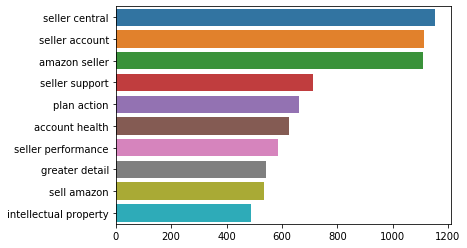

In [30]:
import seaborn as sns

top_n_bigrams=get_top_ngram(train['Leading Comment'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

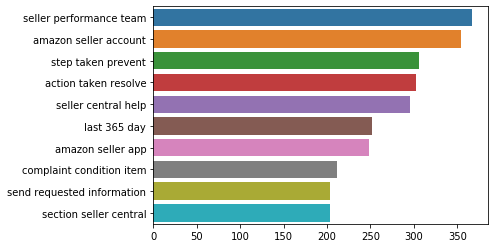

In [31]:
top_tri_grams=get_top_ngram(train['Leading Comment'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

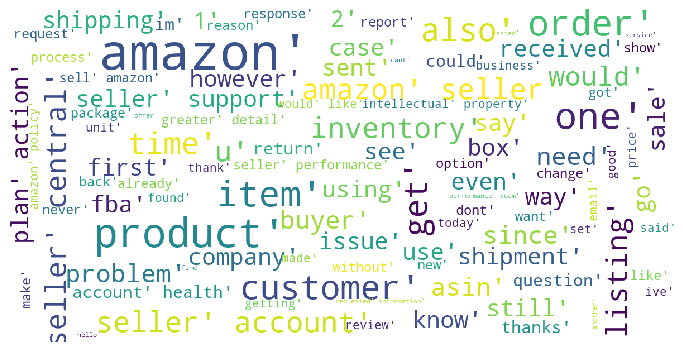

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

# TF IDF model

In [34]:
tf1 = (train['Leading Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,received,3
1,already,3
2,last,3
3,shipment,3
4,weve,2
5,sent,2
6,fulfillment,2
7,center,2
8,checked,1
9,21st,1


In [37]:
import numpy as np
for i,word in enumerate(tf1['words']):
      tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['Leading Comment'].str.contains(word)])))

In [38]:
tf1

,words,tf,idf
0,received,3,1.770563
1,already,3,2.645288
2,last,3,2.357159
3,shipment,3,2.508636
4,weve,2,2.346507
5,sent,2,1.985734
6,fulfillment,2,2.914101
7,center,2,3.557124
8,checked,1,3.374803
9,21st,1,6.200636


In [39]:
#TFIDF model
tf1['tfidf'] = tf1['tf'] * tf1['idf']

In [43]:
tf1

,words,tf,idf,tfidf
0,received,3,1.770563,5.311690
1,already,3,2.645288,7.935864
2,last,3,2.357159,7.071478
3,shipment,3,2.508636,7.525909
4,weve,2,2.346507,4.693014
5,sent,2,1.985734,3.971469
6,fulfillment,2,2.914101,5.828203
7,center,2,3.557124,7.114249
8,checked,1,3.374803,3.374803
9,21st,1,6.200636,6.200636


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(train['Leading Comment'])
print(train_vect)

  (0, 846)	0.7514612956490553
  (0, 478)	0.4460729284294305
  (0, 570)	0.4861325577081165
  (1, 445)	0.1950013676248981
  (1, 894)	0.09560113581840936
  (1, 774)	0.11215963958094882
  (1, 377)	0.16381758877378458
  (1, 167)	0.15902227889962017
  (1, 395)	0.1649577315037258
  (1, 42)	0.1741486776326209
  (1, 509)	0.19034960815989357
  (1, 806)	0.38125115875268734
  (1, 122)	0.2111238342665635
  (1, 707)	0.29857900427136624
  (1, 155)	0.3295852419242268
  (1, 357)	0.2859908974893536
  (1, 270)	0.12737309648880382
  (1, 796)	0.22806741437641176
  (1, 978)	0.3598694236857155
  (1, 455)	0.10529029434584392
  (1, 327)	0.10145013331603034
  (1, 807)	0.12849449920916675
  (1, 168)	0.1841958797993286
  (1, 251)	0.19616616636647716
  (1, 791)	0.07283387733523052
  :	:
  (7886, 791)	0.12917941149024656
  (7887, 230)	0.6489764909372381
  (7887, 490)	0.36962693872517743
  (7887, 832)	0.23447065857081587
  (7887, 334)	0.2689165264552918
  (7887, 231)	0.18029471284080947
  (7887, 710)	0.2731457573260

<p style="color:blue">The notebook I provided was only a reference of code you can use to preprocess data and do some few basic data analysis. When dealing with data the more extensive your research and understanding of it, the easier to harness its power.
I wanted all of you to spend this week on understanding more your data so when we trained complex models it would be easier to understand its results.</p>

<p style="color:blue">A trick to do a good EDA, is to first ask yourself questions about things you would like to understand from your data and try to answer these questions by visualizations and share your insights with other people by explaining what you found under each visualization.</p>